<a href="https://colab.research.google.com/github/karanjogi/Practice/blob/master/Lecture_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 20)

##Whole Dataset Visulaization

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

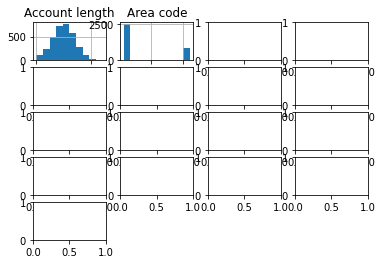

In [6]:
df.drop('State', axis=1).hist();

Since String data cannot pe plot convert some into int

In [0]:
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})

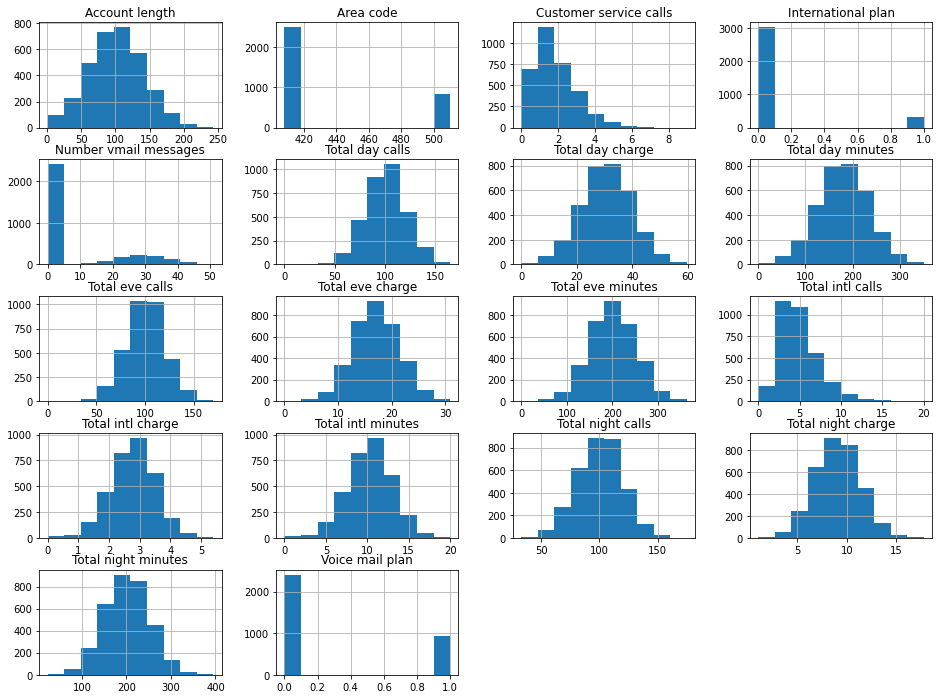

In [10]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop(['State', 'Churn'], axis=1).hist();

**Include Churn as well**

In [0]:
df['Churn'] = df['Churn'].astype('int')

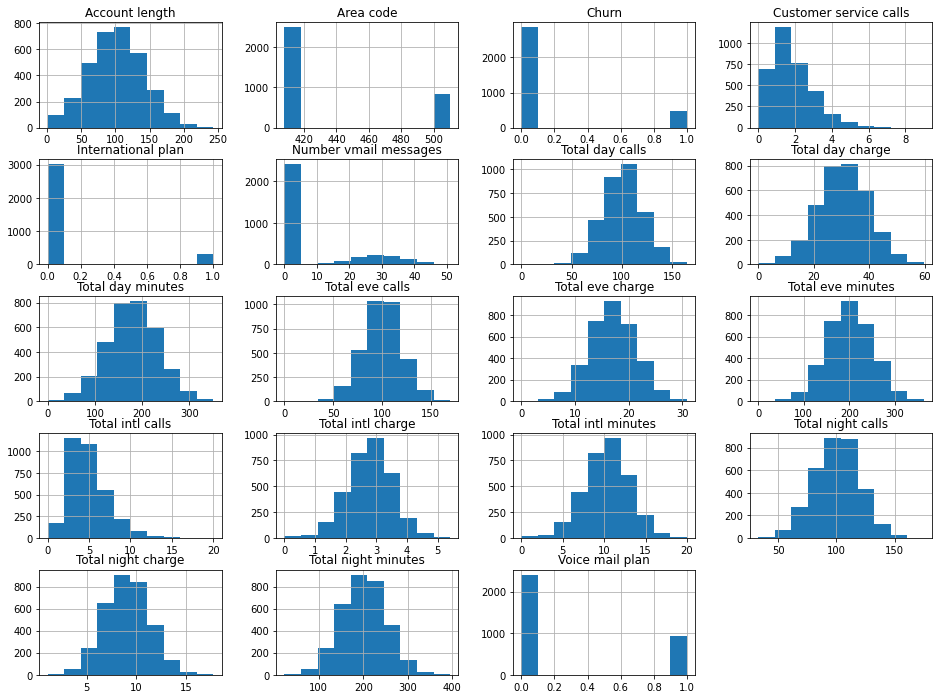

In [14]:
df.drop('State', axis=1).hist();

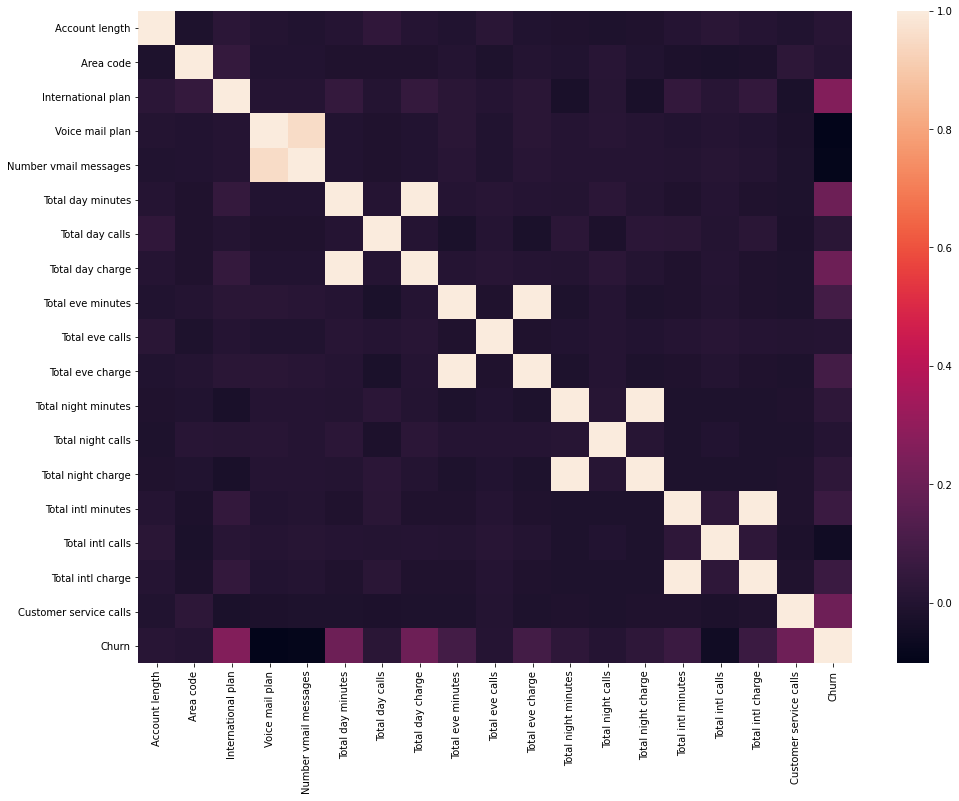

In [15]:
sns.heatmap(df.corr())

Since charges are related to time of call we can drop charges

In [0]:
charge_cols = [feature_name for feature_name in df.columns
 if 'charge' in feature_name ]

In [0]:
#We drop these columns
df.drop(charge_cols, axis=1, inplace=True)

In [20]:
df.shape

(3333, 16)

####Let's start with Numeric Features

In [21]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

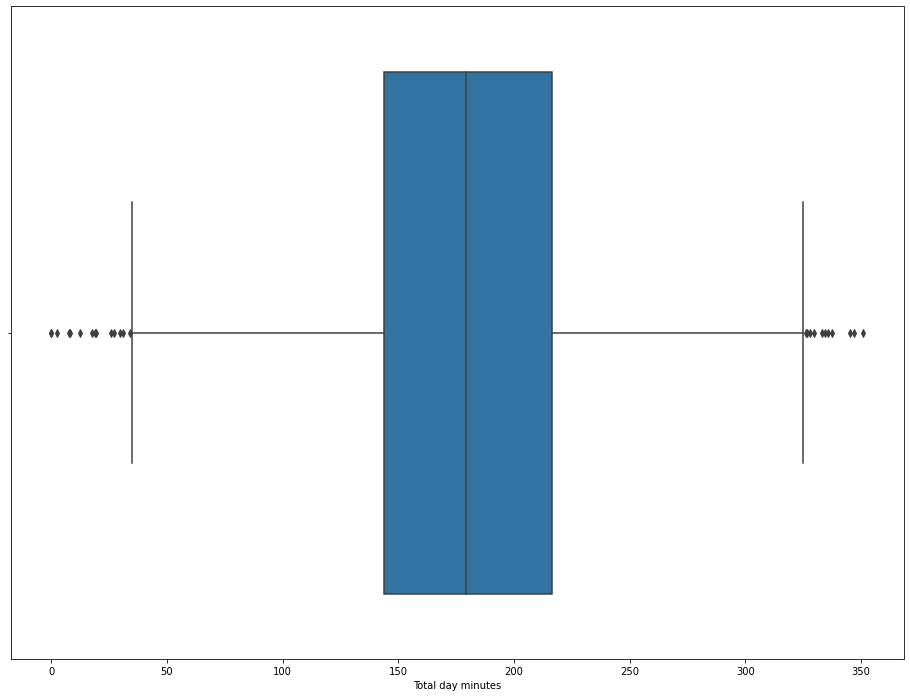

In [22]:
sns.boxplot(x='Total day minutes', data=df)

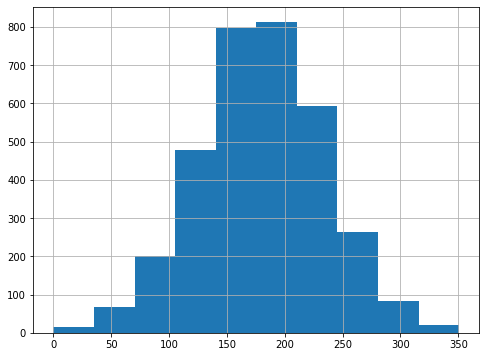

In [24]:
 plt.rcParams['figure.figsize'] = (8,6)
 df['Total day minutes'].hist();

##Let's Check a Categorical feature

In [25]:
df['State'].nunique()

51

In [27]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [28]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

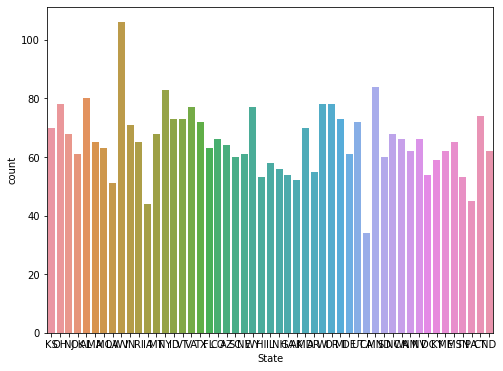

In [30]:
sns.countplot(x='State',data=df)

## **Interaction between features**

**Numeric-Numeric**